In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\u1150670\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\u1150670\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\u1150670\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data

After loading the most useful libraries, let us load the data into a Pandas DataFrame.

In [103]:
data=pd.read_csv("bank_data_prediction_task.csv")
data=data[data.columns[1:]]

C:\Users\u1150670\AppData\Local\Temp\ipykernel_17184\1908343417.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("bank_data_prediction_task.csv")


In [104]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
0,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,campaign group
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
4,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group


Let us quickly take a look at what are the data types stored in each of the variables and check whether there are any variables that contain null values.

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  object 
 5   housing            41188 non-null  object 
 6   loan               41188 non-null  object 
 7   contact            16476 non-null  object 
 8   month              16476 non-null  object 
 9   day_of_week        16476 non-null  object 
 10  duration           16476 non-null  float64
 11  campaign           16476 non-null  float64
 12  pdays              41188 non-null  int64  
 13  previous           41188 non-null  int64  
 14  poutcome           41188 non-null  object 
 15  emp.var.rate       41188 non-null  float64
 16  cons.price.idx     409

Unfortunately, the data is not complete. However, that is expected, since the whole dataset contains information also on a control group that would not be contacted before. We will not disregard this piece of data, in general, but for a broader overview of relevant parameters, let us take a look at the campaign group only.

In [108]:
campaign=data[data['test_control_flag']=='campaign group']
campaign=campaign.drop(columns='test_control_flag')

In [109]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16476 entries, 0 to 16475
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16476 non-null  int64  
 1   job             16476 non-null  object 
 2   marital         16476 non-null  object 
 3   education       16476 non-null  object 
 4   default         16476 non-null  object 
 5   housing         16476 non-null  object 
 6   loan            16476 non-null  object 
 7   contact         16476 non-null  object 
 8   month           16476 non-null  object 
 9   day_of_week     16476 non-null  object 
 10  duration        16476 non-null  float64
 11  campaign        16476 non-null  float64
 12  pdays           16476 non-null  int64  
 13  previous        16476 non-null  int64  
 14  poutcome        16476 non-null  object 
 15  emp.var.rate    16476 non-null  float64
 16  cons.price.idx  16476 non-null  float64
 17  cons.conf.idx   16476 non-null 

This fragment of the whole dataset does not contain any null values. In total, the campaign group dataset consists of 16476 records and 21 variables (20 features and 1 target). Let us take a look at the data by looking at the basic statistical properties of each of the numerical variables. Please mind that 12 variables are non-numerical (categorical) and will need to be converted to numerical values in the next steps.

In [110]:
campaign.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000
mean,39.987922,259.660172,2.546856,962.779983,0.172675,0.078253,93.573239,-40.530681,3.616076,5166.873908
std,10.488565,260.660561,2.699664,186.159341,0.491860,1.570667,0.577235,4.636000,1.736256,72.211048
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [111]:
len(campaign.columns)

21

In [112]:
campaign.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Here, we convert the categorical variables into integer values:

In [113]:
#convert categorical values to numerical for type(col) = str
for col in campaign.columns:
    if isinstance(campaign[col][0],str):
        campaign[col]=campaign[col].astype('category')
        campaign[col]=campaign[col].cat.codes

The figures below, illustrate histograms of each of the features for this dataset. This also includes the target (y).

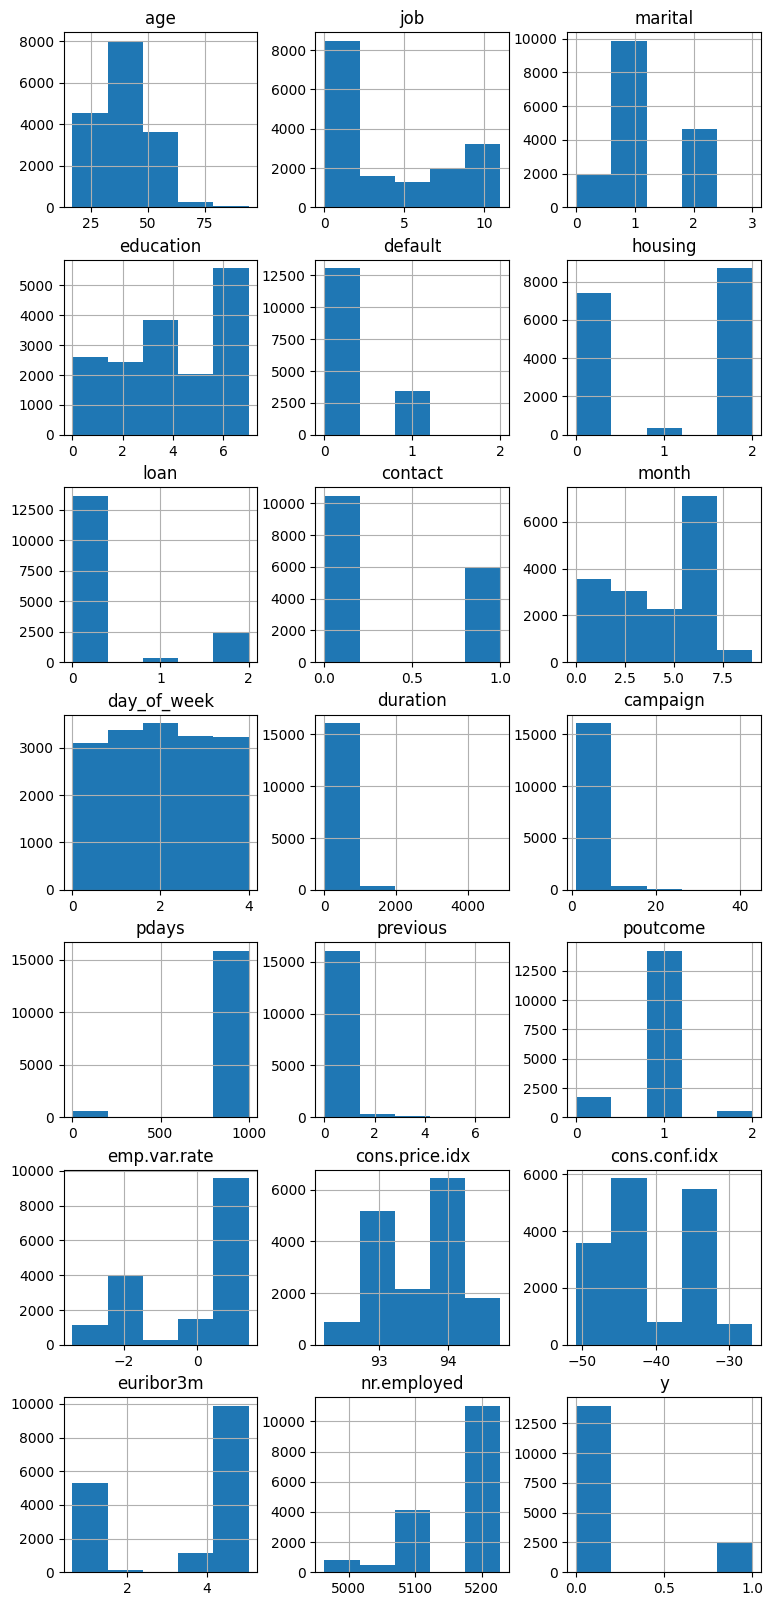

In [114]:
fig,axs = plt.subplots(nrows=7,ncols=3,figsize = (9,20))
campaign.hist(ax = axs, bins=5)
plt.show()

Since the target only has two possible values, we can also take a look at the distribution of its values. A vast majority did not subscribe to a term deposit (value = 0), with only 15.1% of subscribers.

From the point of view of the Machine Learning models applied below, this may lead to worse accuracy of predictions. 


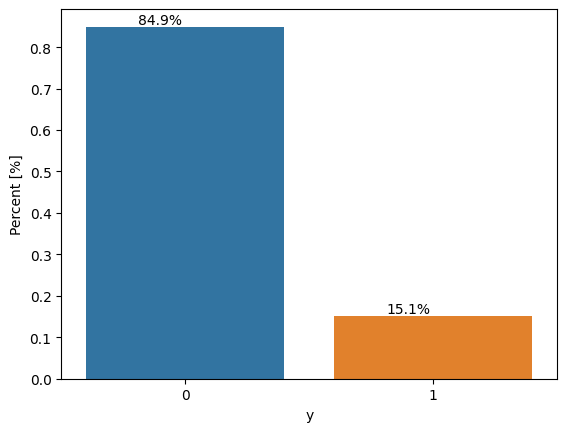

In [14]:
import seaborn as sns
ax = sns.barplot(x = 'y', y = 'y', data = campaign, estimator = lambda x: len(x) / len(campaign))
ax.set(ylabel = 'Percent [%]')
for p in ax.patches:
     ax.annotate("{:.1%}".format(p.get_height()), (p.get_x()+0.3, p.get_height()), ha = 'center', va = 'bottom', color= 'black')

# Feature Selection

## Variance threshold

In order to start extracting the most relevant features from the dataset, we can start from the most crude method - variance threshold. Basically, features with mostly the same values or with small variation will be dropped. 


In [15]:
from sklearn.feature_selection import VarianceThreshold

def varth(threshold, X_df):
    var_threshold = VarianceThreshold(threshold = threshold)
    var_threshold.fit(X_df)
    sum(var_threshold.get_support()) 
    th_columns = [column for column in X_df.columns if column not in X_df.columns[var_threshold.get_support()]]
    return th_columns

for th in [0.0, 0.1, 0.5, 1.0]:
    cols = varth(th, campaign)
    print('Columns below variance threshold = ' + str(th) + ' : \n' + str(cols))

Columns below variance threshold = 0.0 : 
[]
Columns below variance threshold = 0.1 : 
[]
Columns below variance threshold = 0.5 : 
['marital', 'default', 'contact', 'previous', 'poutcome', 'cons.price.idx', 'y']
Columns below variance threshold = 1.0 : 
['marital', 'default', 'housing', 'loan', 'contact', 'previous', 'poutcome', 'cons.price.idx', 'y']


Making a conservative assumption of variance threshold of 0.1, we see  that no features would be characterized by such low variance. Therefore, we cannot drop any feature yet.

## Pairwise correlation between features
When pairs of features are highly correlated with each other, we can treat them as redundant. Let us take a look at the correlation

In [16]:
corr_df=campaign.corr().abs()
corr_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001730,0.395250,0.122956,0.165992,0.006973,0.003949,0.006211,0.026427,0.017723,...,0.005783,0.030075,0.021171,0.017423,0.004366,0.001993,0.123604,0.005564,0.023151,0.002539
job,0.001730,1.000000,0.031229,0.129192,0.028164,0.004231,0.002927,0.024731,0.035586,0.003304,...,0.012974,0.024931,0.022048,0.004669,0.011972,0.016837,0.047237,0.009476,0.020024,0.024778
marital,0.395250,0.031229,1.000000,0.108019,0.085748,0.000345,0.003466,0.058594,0.012399,0.006620,...,0.009195,0.031909,0.043108,0.006725,0.080592,0.060226,0.034793,0.087930,0.078569,0.095794
education,0.122956,0.129192,0.108019,1.000000,0.184333,0.017987,0.003798,0.104138,0.072921,0.018230,...,0.016101,0.054472,0.045596,0.015541,0.040751,0.076422,0.082585,0.032634,0.039308,0.000364
default,0.165992,0.028164,0.085748,0.184333,1.000000,0.016072,0.004475,0.140642,0.019629,0.003015,...,0.023925,0.081819,0.107816,0.028252,0.210084,0.171170,0.032447,0.202126,0.196165,0.078027
housing,0.006973,0.004231,0.000345,0.017987,0.016072,1.000000,0.045866,0.081087,0.023831,0.008280,...,0.008557,0.023271,0.022254,0.001132,0.058987,0.074294,0.040290,0.059724,0.046588,0.036993
loan,0.003949,0.002927,0.003466,0.003798,0.004475,0.045866,1.000000,0.017458,0.004721,0.000703,...,0.009438,0.000220,0.004168,0.009021,0.014259,0.014192,0.021568,0.015474,0.009946,0.027704
contact,0.006211,0.024731,0.058594,0.104138,0.140642,0.081087,0.017458,1.000000,0.278713,0.005841,...,0.071293,0.111499,0.212168,0.127234,0.393558,0.591828,0.253420,0.399256,0.267047,0.098308
month,0.026427,0.035586,0.012399,0.072921,0.019629,0.023831,0.004721,0.278713,1.000000,0.027537,...,0.073888,0.053079,0.103717,0.058285,0.169234,0.001743,0.014967,0.107886,0.213170,0.005102
day_of_week,0.017723,0.003304,0.006620,0.018230,0.003015,0.008280,0.000703,0.005841,0.027537,1.000000,...,0.037317,0.011601,0.000344,0.015414,0.028128,0.005139,0.040731,0.032089,0.022305,0.009882


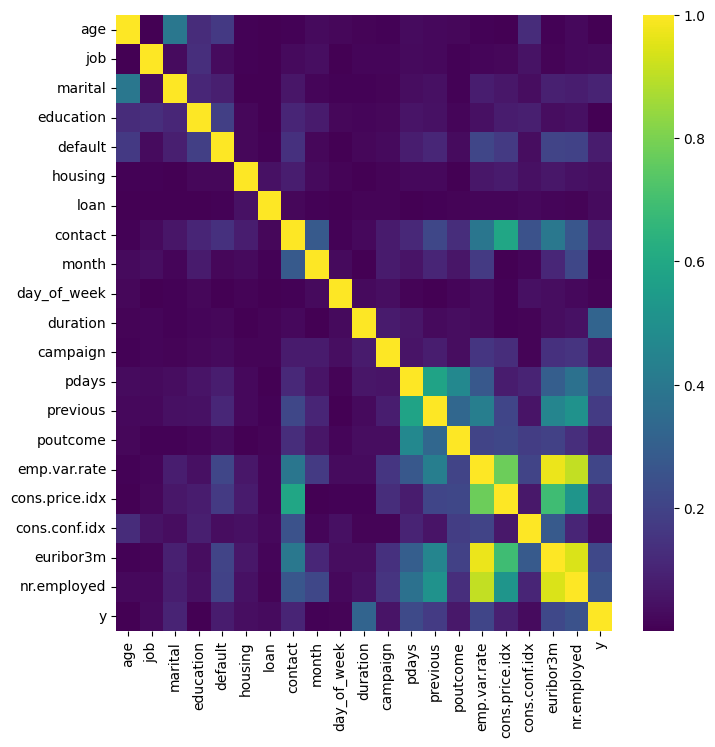

In [17]:
fig1, axhm = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.heatmap(corr_df, cmap='viridis', ax=axhm)
plt.show()

Setting the threshold for correlation to 0.8, we see that there are two features that are correlated at least to that extent:

In [18]:
upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k = 1).astype(bool))
high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print('Columns with high correlation (> 0.8): \n' + str(high_corr))
campaign=campaign.drop(columns=high_corr)

Columns with high correlation (> 0.8): 
['euribor3m', 'nr.employed']


Therefore, we drop these two variables.

## Correlation with the target

The next test, checks whether features are correlated with the target to at least a certain degree. Here, we set a minimum acceptable value for correlation between a feature and a target to 0.01. This lets us drop another five features:

In [19]:
new_corr=campaign.corr()
corr_outcome = abs(new_corr['y'])
display(corr_outcome)

age               0.002539
job               0.024778
marital           0.095794
education         0.000364
default           0.078027
housing           0.036993
loan              0.027704
contact           0.098308
month             0.005102
day_of_week       0.009882
duration          0.316615
campaign          0.052679
pdays             0.223795
previous          0.175909
poutcome          0.065801
emp.var.rate      0.206111
cons.price.idx    0.086526
cons.conf.idx     0.029122
y                 1.000000
Name: y, dtype: float64

In [20]:
small_corr = corr_outcome[corr_outcome < 0.01]
display(small_corr.index)
campaign = campaign.drop(small_corr.index, axis=1)
campaign

Index(['age', 'education', 'month', 'day_of_week'], dtype='object')

,job,marital,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,7,1,0,2,0,1,226.0,1.0,999,0,1,1.1,93.994,-36.4,0
1,7,1,0,0,2,1,307.0,1.0,999,0,1,1.1,93.994,-36.4,0
2,1,1,1,0,0,1,217.0,1.0,999,0,1,1.1,93.994,-36.4,1
3,7,2,0,2,0,1,50.0,1.0,999,0,1,1.1,93.994,-36.4,0
4,7,2,0,2,0,1,222.0,1.0,999,0,1,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,9,0,0,2,0,0,385.0,3.0,4,2,2,-1.1,94.767,-50.8,1
16472,3,0,0,0,0,0,403.0,2.0,999,0,1,-1.1,94.767,-50.8,1
16473,8,1,0,2,0,1,112.0,1.0,999,0,1,-1.1,94.767,-50.8,1
16474,5,1,0,2,0,0,208.0,1.0,1,6,2,-1.1,94.767,-50.8,1


## Mutual information
Mutual information is another useful measure of how variables depend on each other. The reduction in uncertainty for one variable given a known value of the other variable can be measured using this parameter.

In [21]:
from sklearn.feature_selection import mutual_info_classif
X = campaign.drop(['y'], axis = 1)
Y = campaign['y']
mutual_info = mutual_info_classif(X, Y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
mutual_info

job               0.005815
marital           0.009653
default           0.002587
housing           0.005457
loan              0.004108
contact           0.003711
duration          0.048628
campaign          0.000376
pdays             0.020905
previous          0.013228
poutcome          0.018545
emp.var.rate      0.024246
cons.price.idx    0.035495
cons.conf.idx     0.032353
dtype: float64

Using this final measurement we limit ourselves to the 10 most relevant features for our model. We do that using SelectKBest method from scikit-learn package.

In [22]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k = 10)
sel_cols.fit(X,Y)
cols = X.columns[sel_cols.get_support()]
X = X[cols]
X

,job,marital,contact,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,7,1,1,226.0,999,0,1,1.1,93.994,-36.4
1,7,1,1,307.0,999,0,1,1.1,93.994,-36.4
2,1,1,1,217.0,999,0,1,1.1,93.994,-36.4
3,7,2,1,50.0,999,0,1,1.1,93.994,-36.4
4,7,2,1,222.0,999,0,1,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...
16471,9,0,0,385.0,4,2,2,-1.1,94.767,-50.8
16472,3,0,0,403.0,999,0,1,-1.1,94.767,-50.8
16473,8,1,1,112.0,999,0,1,-1.1,94.767,-50.8
16474,5,1,0,208.0,1,6,2,-1.1,94.767,-50.8


# Testing ML models
## Splitting to training and test dataset
Now we can prepare the data with reduced number of features and first split the dataset to training and test data. Here, the split is 80:20.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Data normalization

Since the features we have in the dataset have different ranges of minimum and maximum values, we should first rescale the data using min-max normalisation.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## ML models

Nowadays, there are numerous machine learning models available. Here, we will test the most popular ones:
* **Decision Tree Classifier** -  a decision support tool that uses a tree-like model of decisions and their possible consequences
* **Adaptive Boosting Classifier** - gives equal weights to all the data points. In the next steps, it assigns higher weights to points that are wrongly classified and so on.
* **Logistic Regression** - compared to linear regression (fitting a straight line to points), it provides a discreet output. This fits best the targets like ours - a binary choice - 0 or 1.
* **Support Vector Machines** -  a linear model which means that the classification decision is based on the value of a linear combination of the characteristics.
* **K-nearest neighbor Classifier** - a supervised learning classifier which makes predictions about nearest vicinity of a given point.
* **Gradient boosting Classifier** - a method based on decision trees, where the method is computing a negative gradient of the loss function with respect to the prognosed output during the learning process
* **Extreme gradient boosting Classifier** - a regularized version of the above.
* **Random forest** - typically less accurate than gradient boosting models, but also a very useful classification (or regression) algorithm based on decision trees 
* **Neural network** *(MLPClassifier)* - so-called multi-layer Perceptron classifier - relies on a fully connected neural network.

For some of the methods we will also optimize internal parameters of the models in order to achieve better model accuracies without overfitting - namely when our ML model learnt the whole dataset too thoroughly and a slight change might be understood as a complete change to the dataset. 

In order to do this, we will test the use of either GridSearchCV or RandomizedSearchCV, depending on how much can we expect from the model without these optimizations.

In [25]:
# Classification Models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
DT_classifier = tree.DecisionTreeClassifier(random_state = 42)
Ada_classifier_default = AdaBoostClassifier(base_estimator = DT_classifier)
dict_classifiers = {
    "Ada Classifier": Ada_classifier_default,
    "Logistic Regression": LogisticRegression(random_state = 42),
    "Nearest Neighbors": KNeighborsClassifier(algorithm='auto'),
    "Linear SVM": SVC(random_state = 1, probability = True),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Extreme Gradient Boosting Classifier": xgboost.XGBClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [26]:
no_classifiers = len(dict_classifiers.keys())

def classify(X_train, Y_train):
#     df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)), columns = ['classifier', 'train_score'])
    results={}
    count = 0
    for key, classifier in dict_classifiers.items():
        results[key]={}
        classifier.fit(X_train, Y_train)
        train_score = classifier.score(X_train, Y_train)
        results[key]['train_score'] = train_score
        count+=1
    return pd.DataFrame(results).transpose()

In [27]:
df_results = classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                                      train_score
Ada Classifier                           0.988316
Decision Tree                            0.988316
Random Forest                            0.972382
Extreme Gradient Boosting Classifier     0.911229
Nearest Neighbors                        0.882929
Gradient Boosting Classifier             0.874659
Logistic Regression                      0.858042
Linear SVM                               0.854932
Neural Net                               0.853642
Naive Bayes                              0.812974


Here, we were able to check the accuracy of a larger set of ML models in their default version. However, let us check whether our models are performing overfitting. 

# Cross-validation

One of the most efficient methods to check whether we are performing overfitting to the model is to use a cross-validation measure. This method divides the dataset into 1/3 - testing, 2/3 - training data. Testing will be done three times. 

In [28]:
# Use Cross-validation.
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Extreme Gradient Boosting Classifier
xgrad_clf = xgboost.XGBClassifier()
xgrad_scores = cross_val_score(xgrad_clf, X_train, y_train, cv=3)
xgrad_mean = xgrad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=10)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'XGBoost', 'Rand FC', 'Neural Classifier', 'Naive Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean, grad_mean, xgrad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [29]:
result_df.sort_values(by='Crossval Mean Scores',ascending=False)

,Classifiers,Crossval Mean Scores
3,Grad B CLF,0.864036
4,XGBoost,0.859484
6,Neural Classifier,0.853263
7,Naive Bayes,0.853263
0,SVC,0.852125
1,KNN,0.844233
5,Rand FC,0.833915
2,Dec Tree,0.799468


## Parameter tuning

In the section below, we will prepare and test optimized versions of the most relevant ML models that were discussed above.

### Tuning for Adaptive boosting classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import uniform, truncnorm, randint
DT_classifier = DecisionTreeClassifier(random_state = 42)
Ada_classifier = AdaBoostClassifier(base_estimator = DT_classifier)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# This line prints dictionary of parameters that can be used in hypertuning
print(Ada_classifier.get_params().keys())

parameters = {'base_estimator__criterion' : ['gini', 'entropy'],
              'base_estimator__max_depth' : randint(2,10),
              'base_estimator__min_samples_leaf' : randint(2,10),
              'base_estimator__splitter'  : ['best', 'random'],
              'learning_rate'             : uniform(0.01,0.8),
              'algorithm'                 : ['SAMME', 'SAMME.R'],
              'n_estimators'              : randint(2,15)}

Ada_classifier = RandomizedSearchCV(Ada_classifier, parameters, cv = cv, scoring = 'accuracy')
Ada_classifier.fit(X_train, y_train)
print(f'Best parameters: {Ada_classifier.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{Ada_classifier.best_score_:.3f}')

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])
Best parameters: {'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 6, 'base_estimator__splitter': 'best', 'learning_rate': 0.2882392809106048, 'n_estimators': 7}
Accuracy score of the best_estimator: 0.865


### Tuning for Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
Logistic_Regression = LogisticRegression(random_state = 1)
print(LogisticRegression().get_params().keys())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
Logistic_Regression = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
Logistic_Regression.fit(X_train, y_train)
print(f'Best parameters: {Logistic_Regression.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{Logistic_Regression.best_score_:.3f}')

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    rai

Best parameters: {'C': 0.47774172475935767, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score of the best_estimator: 0.860


### Tuning for SVC

In [47]:
from sklearn.svm import SVC

# random search logistic regression model on the sonar dataset

from sklearn.model_selection import RepeatedStratifiedKFold
Linear_SVM = SVC(random_state = 1, probability = True)
print(Linear_SVM.get_params().keys())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
model = SVC()
# define search space
space = {"C": uniform(2, 10),
         "gamma": uniform(0.1, 1)}
Linear_SVM = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
Linear_SVM.fit(X_train, y_train)
print(f'Best parameters: {Linear_SVM.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{Linear_SVM.best_score_:.3f}')


dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters: {'C': 10.644794300545998, 'gamma': 0.4226809968367464}
Accuracy score of the best_estimator: 0.854


### Tuning for KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

# with GridSearch
KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN.fit(X_train, y_train)
print(f'Best parameters: {KNN.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{KNN.best_score_:.3f}')


    

Best parameters: {'leaf_size': 40, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Accuracy score of the best_estimator: 0.851


### Tuning for GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':[0.5,0.1,0.01,0.001], 
          'n_estimators':[1,5,10,50,100],
          'max_depth':[2,4,8,16]}

tuning = GridSearchCV(estimator = GradientBoostingClassifier( min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = params, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)

print(f'Best parameters: {tuning.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{tuning.best_score_:.3f}')



Best parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10}
Accuracy score of the best_estimator: 0.866


### Tuning for XGBoostClassifier

In [33]:
from xgboost import XGBClassifier
params =  {'learning_rate':[0.5,0.1,0.01,0.001], 
          'n_estimators':[1,5,10,50,100],
          'max_depth':[2,4,8,16]}

tuning_xg = GridSearchCV(estimator = XGBClassifier(max_depth=4, subsample=1, random_state=10), 
            param_grid = params, scoring='accuracy',n_jobs=4, cv=5)
tuning_xg.fit(X_train,y_train)

print(f'Best parameters: {tuning_xg.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{tuning_xg.best_score_:.3f}')


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy score of the best_estimator: 0.866


## Final tuned models
The model parameters have been tuned above. Let us save these below:

In [38]:
#Adaptive classifier
from sklearn.tree import DecisionTreeClassifier

Ada_best_params = {'algorithm': 'SAMME', 'learning_rate': 0.2882392809106048, 'n_estimators': 7}
best_DT_classifier = DecisionTreeClassifier(random_state = 42,criterion = 'gini', max_depth = 5, min_samples_leaf = 6,splitter='best')
Ada_classifier = AdaBoostClassifier(base_estimator = best_DT_classifier, **Ada_best_params)

#Logistic regression
Log_reg_best_params = {'C': 0.47774172475935767, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic_Regression = LogisticRegression(random_state = 1, **Log_reg_best_params)

# Linear SVM
SVC_params = {'C': 10.644794300545998, 'gamma': 0.4226809968367464}
Linear_SVM = SVC(random_state = 1, probability = True, **SVC_params)

# k-neighbors
KNN_params = {'leaf_size': 40, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
KNN = KNeighborsClassifier(algorithm='auto', **KNN_params)

# Gradient boosting
tuning_params = {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10}
tuning = GradientBoostingClassifier( min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10, **tuning_params)

# Extreme Gradient boosting
tuning_xg_params = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
tuning_xg = XGBClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10, **tuning_xg_params)


In the end, the collection of tuned and default models will be stored in a dictionary below:

In [42]:
models={
    'default': {
    "Ada Classifier": Ada_classifier_default,
    "Logistic Regression": LogisticRegression(random_state = 42),
    "Nearest Neighbors": KNeighborsClassifier(algorithm='auto'),
    "Linear SVM": SVC(random_state = 1, probability = True),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Extreme Gradient Boosting Classifier": xgboost.XGBClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
               },
    'tuned': {
    "Ada Classifier": Ada_classifier,
    "Logistic Regression": Logistic_Regression,
    "Nearest Neighbors": KNN,
    "Linear SVM": Linear_SVM,
    "Gradient Boosting Classifier": tuning,
    "Extreme Gradient Boosting Classifier": tuning_xg,
    "Decision Tree": best_DT_classifier,
    "Random Forest": None,
    "Neural Net": None,
    "Naive Bayes": None
    }
}

In [43]:
models

{'default': {'Ada Classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
  'Logistic Regression': LogisticRegression(random_state=42),
  'Nearest Neighbors': KNeighborsClassifier(),
  'Linear SVM': SVC(probability=True, random_state=1),
  'Gradient Boosting Classifier': GradientBoostingClassifier(),
  'Extreme Gradient Boosting Classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monot

## Cross-validation score
Now, let us compare and check whether the resulting optimized models provide better cross-validation scores, so that we also know if those are overfitting.

In [45]:
cross_validation = {}
for model in models['default'].keys():
    clf = models['default'][model]
    score = cross_val_score(clf, X_train, y_train, cv = 3)
    mean=score.mean()
    if models['tuned'][model]!=None:
        clf_optimized = models['tuned'][model]
        score_optimized = cross_val_score(clf_optimized, X_train, y_train, cv = 3)
        mean_optimized = score_optimized.mean()
    else:
        mean_optimized = 'N/A'
    cross_validation[model] = {'Mean score (default)': mean, 'Mean score (optimized)': mean_optimized }

# Create a Dataframe with the results.

cross_validation = pd.DataFrame(data=cross_validation)
cross_validation

C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

,Ada Classifier,Logistic Regression,Nearest Neighbors,Linear SVM,Gradient Boosting Classifier,Extreme Gradient Boosting Classifier,Decision Tree,Random Forest,Neural Net,Naive Bayes
Mean score (default),0.828528,0.856601,0.844233,0.852125,0.864036,0.859484,0.802503,0.836646,0.853263,0.816615
Mean score (optimized),0.861532,0.858422,0.850986,0.854249,0.864492,0.863961,0.859560,N/A,N/A,N/A


# Confusion Matrix
This metric tells us how well does the model distinguish between clients that will or will not subscribe to a term deposit. Technically, we can see what are the odds that someone may be misclassified, for example.

Diagonal elements relate to a correct classification: real value and predicted value are consistent, off-diagonal elements indicate that the element was classified as e.g. '0', but in reality was '1'.



In [47]:
from sklearn.model_selection import cross_val_predict
predicted_train={}
for model in models['default'].keys():
    clf = models['default'][model]
    if models['tuned'][model]!=None:
        clf_optimized = models['tuned'][model]
        predicted_train[model] ={'predict': cross_val_predict(clf, X_train, y_train, cv=3),
                             'predict_optimized': cross_val_predict(clf_optimized, X_train, y_train, cv=3)
                            }
    else:
        clf_optimized = 'N/A'
        predicted_train[model] ={'predict': cross_val_predict(clf, X_train, y_train, cv=3),
                             'predict_optimized': 'N/A'
                            }
    


C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\u1150670\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

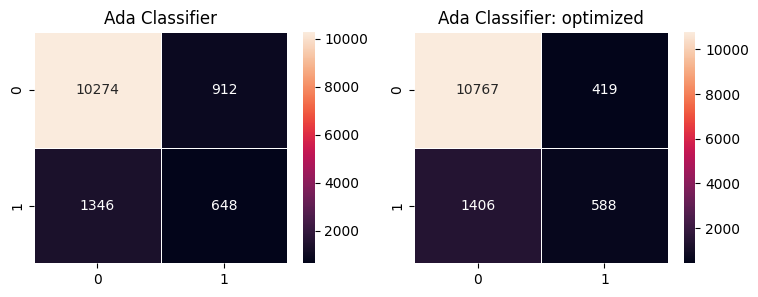

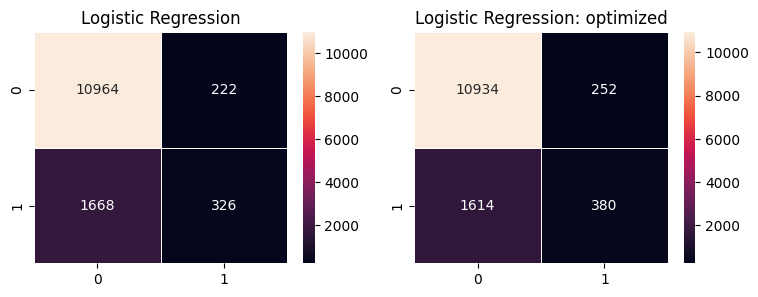

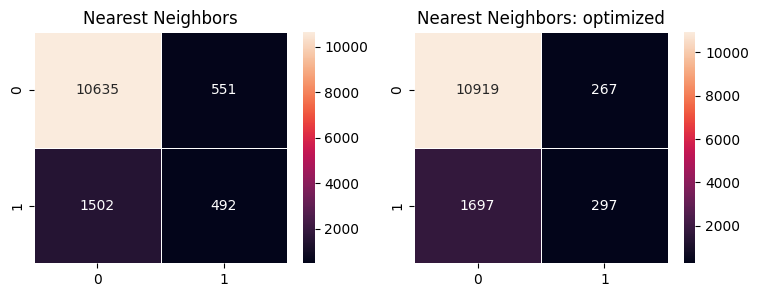

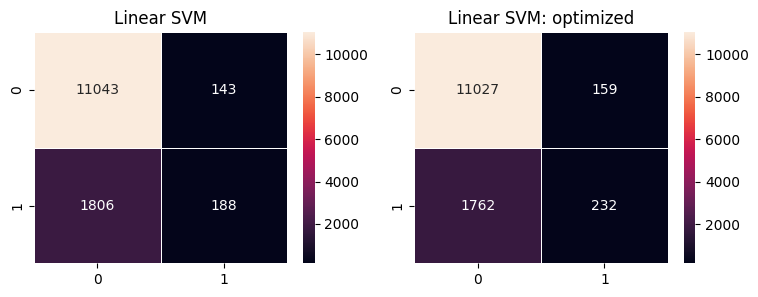

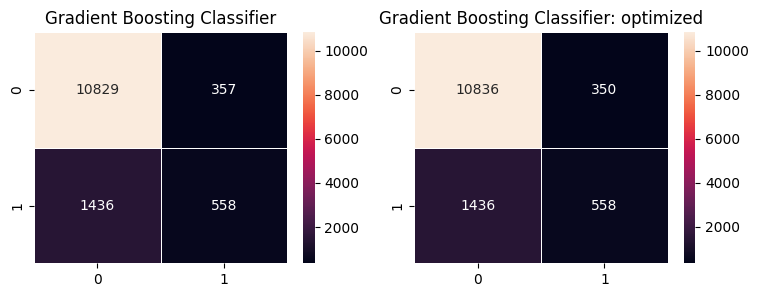

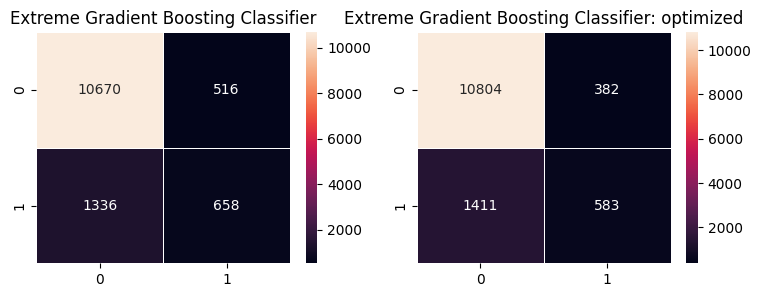

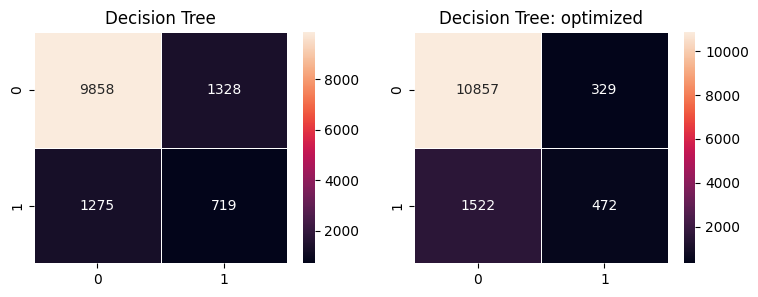

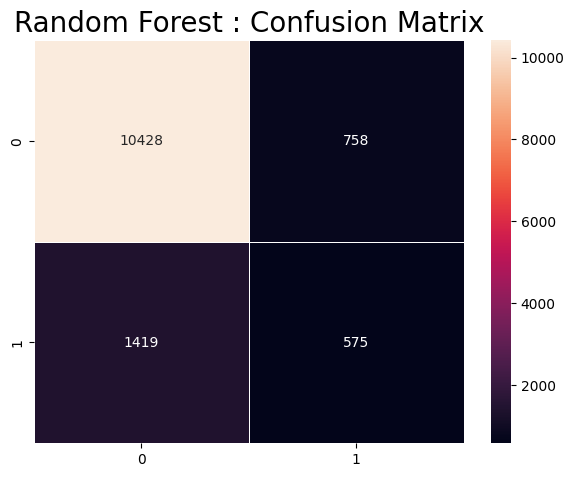

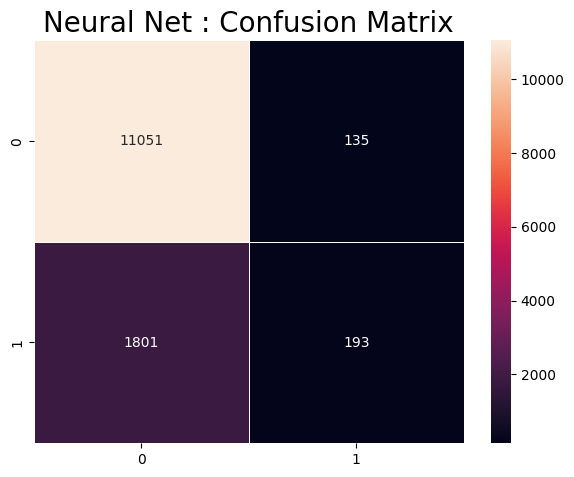

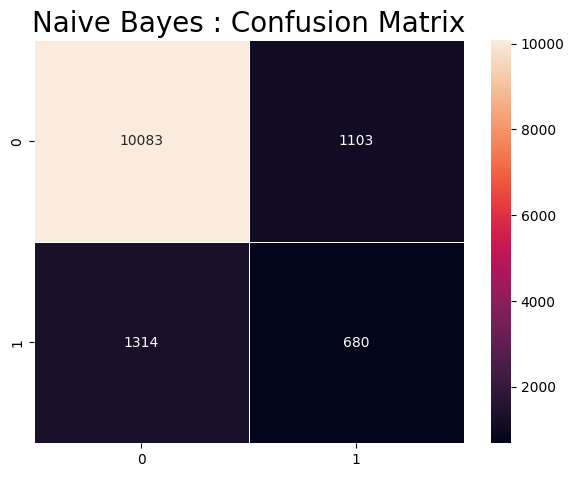

In [56]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
for model in models['default'].keys():
    conf_matrix = confusion_matrix(y_train, predicted_train[model]['predict'])
    if models['tuned'][model]!=None:
        conf_matrix_opt = confusion_matrix(y_train, predicted_train[model]['predict_optimized'])
        f, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))
        sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax1)
        sns.heatmap(conf_matrix_opt, annot=True, fmt="d", linewidths=.5, ax=ax2)
        ax1.set_title(model, fontsize=12)
        ax2.set_title(model+": optimized", fontsize=12)
#         plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
        ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
    else:
        plt.figure()
        sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5)
        plt.title(model+" : Confusion Matrix", fontsize=20)
        plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
        ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
        
# ax.set_xticklabels("")
# ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)


Looking at the values in confusion matrices, we can observe that the parameter optimization did not always leave a positive outcome. Namely, the number of false positives and negatives has actually gone up in case of k Nearest Neighbors model. For other models the number of false negatives may have gone up, but the true positive and true negative number has grown.

# Recall / Precision Tradeoff

Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Y/N" labels does our model detect.

Precision: Means how sure is the prediction of our model that the actual label is a "Y/N".

Recall Precision Tradeoff:
As the precision gets higher the recall gets lower and vice versa. 
That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes"!

In [57]:
from sklearn.metrics import precision_score, recall_score
recall_prec_tradeoff={}
for model in models['default'].keys():
    prec_score = precision_score(y_train, predicted_train[model]['predict'])
    recall = recall_score(y_train, predicted_train[model]['predict'])
    if models['tuned'][model]!=None:
        prec_score_opt = precision_score(y_train, predicted_train[model]['predict_optimized'])
        recall_opt = recall_score(y_train, predicted_train[model]['predict_optimized'])
    else:
        prec_score_opt = 'N/A'
        recall_opt = 'N/A'
    recall_prec_tradeoff[model]={'Precision': prec_score, 'Recall': recall,
                                'Precision (optimized)': prec_score_opt, 'Recall (optimized)': recall_opt}

recall_prec_tradeoff=pd.DataFrame(recall_prec_tradeoff).transpose()
recall_prec_tradeoff

,Precision,Recall,Precision (optimized),Recall (optimized)
Ada Classifier,0.415385,0.324975,0.583913,0.294885
Logistic Regression,0.594891,0.16349,0.601266,0.190572
Nearest Neighbors,0.471716,0.24674,0.526596,0.148947
Linear SVM,0.567976,0.094283,0.59335,0.116349
Gradient Boosting Classifier,0.609836,0.27984,0.614537,0.27984
Extreme Gradient Boosting Classifier,0.560477,0.32999,0.604145,0.292377
Decision Tree,0.351246,0.360582,0.589263,0.23671
Random Forest,0.431358,0.288365,N/A,N/A
Neural Net,0.588415,0.09679,N/A,N/A
Naive Bayes,0.38138,0.341023,N/A,N/A


# F1 score
F1 score is based on the true and false positives and negatives. Simply speaking when it reaches a value above 0.7, we can be certain that the model gives rather good predictions.

In [58]:
from sklearn.metrics import f1_score
f1={}
for model in models['default'].keys():
    f1_sc = f1_score(y_train, predicted_train[model]['predict'])
    if models['tuned'][model]!=None:
        f1_sc_opt = f1_score(y_train, predicted_train[model]['predict_optimized'])
    else:
        f1_sc_opt = 'N/A'
    f1[model]={'F1 score': f1_sc, 
               'F1 score (optimized)': f1_sc_opt}
f1=pd.DataFrame(f1).transpose()
f1

,F1 score,F1 score (optimized)
Ada Classifier,0.36466,0.391869
Logistic Regression,0.256491,0.289414
Nearest Neighbors,0.324004,0.232213
Linear SVM,0.16172,0.194549
Gradient Boosting Classifier,0.383637,0.384562
Extreme Gradient Boosting Classifier,0.415404,0.394052
Decision Tree,0.355853,0.337746
Random Forest,0.345657,N/A
Neural Net,0.166236,N/A
Naive Bayes,0.360074,N/A


### Precision-recall curve 
Now, let us check what is the optimal point for the models, measured as a point where precision and recall overlap with each other

In [62]:
# Increasing the threshold decreases the recall.
threshold = 0


cross_val_scores={}
for model in models['default'].keys():
    cv_predict = cross_val_predict(models['default'][model], X_train,y_train, cv = 3, method = 'predict_proba')
    if models['tuned'][model]!=None:
        cv_predict_opt = cross_val_predict(models['tuned'][model], X_train,y_train, cv = 3, method = 'predict_proba')
        
    else:
         cv_predict_opt = 'N/A'

    cross_val_scores[model] = {'default': cv_predict, 
                               'tuned' : cv_predict_opt}

C:\Users\u1150670\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [12:36:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\u1150670\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [12:36:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\u1150670\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [12:36:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf"

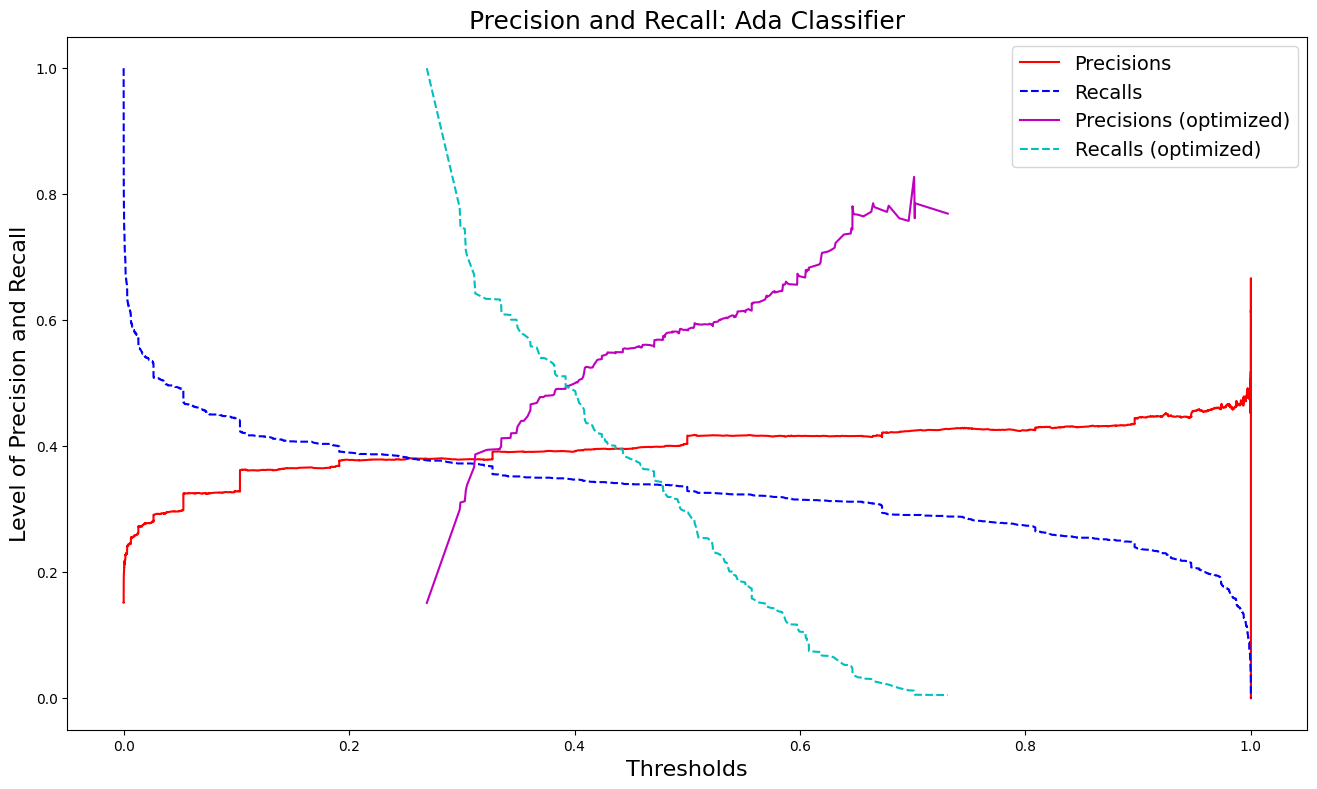

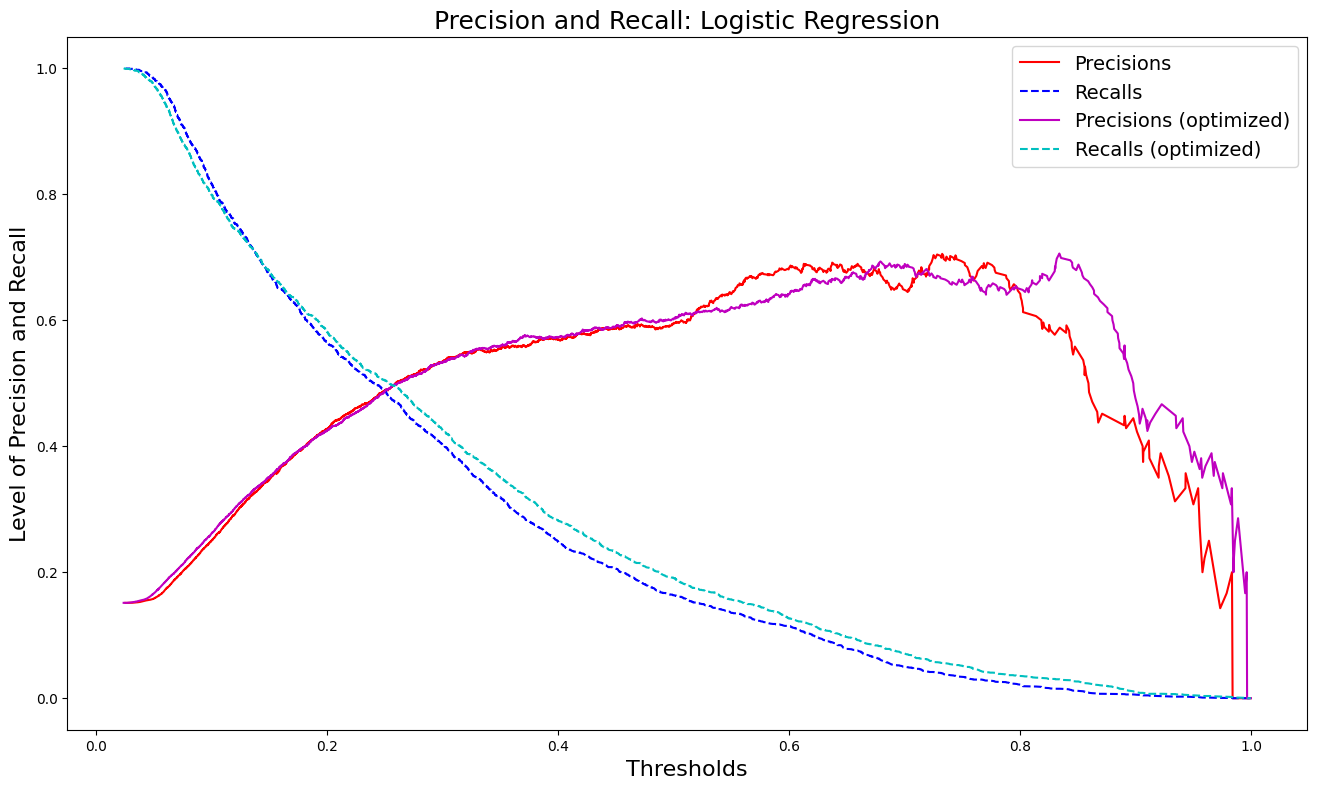

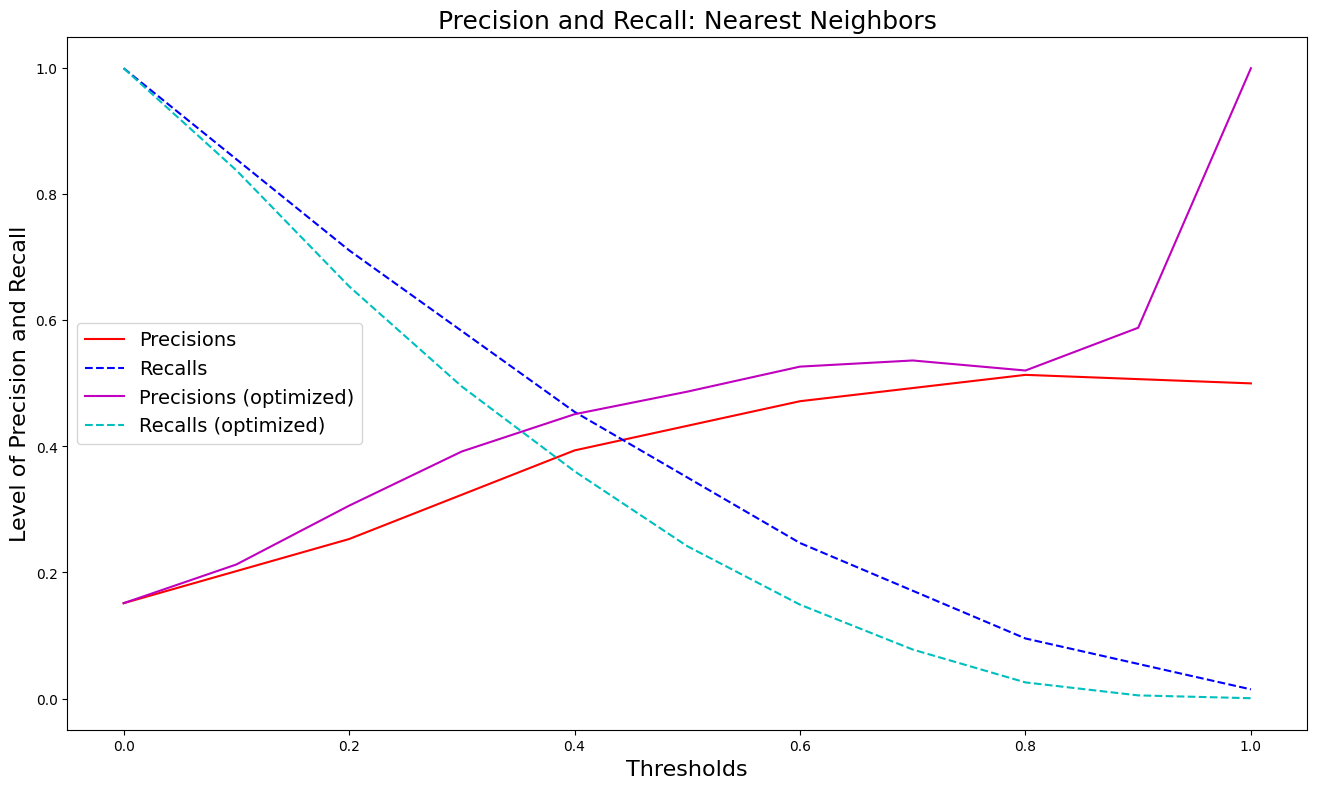

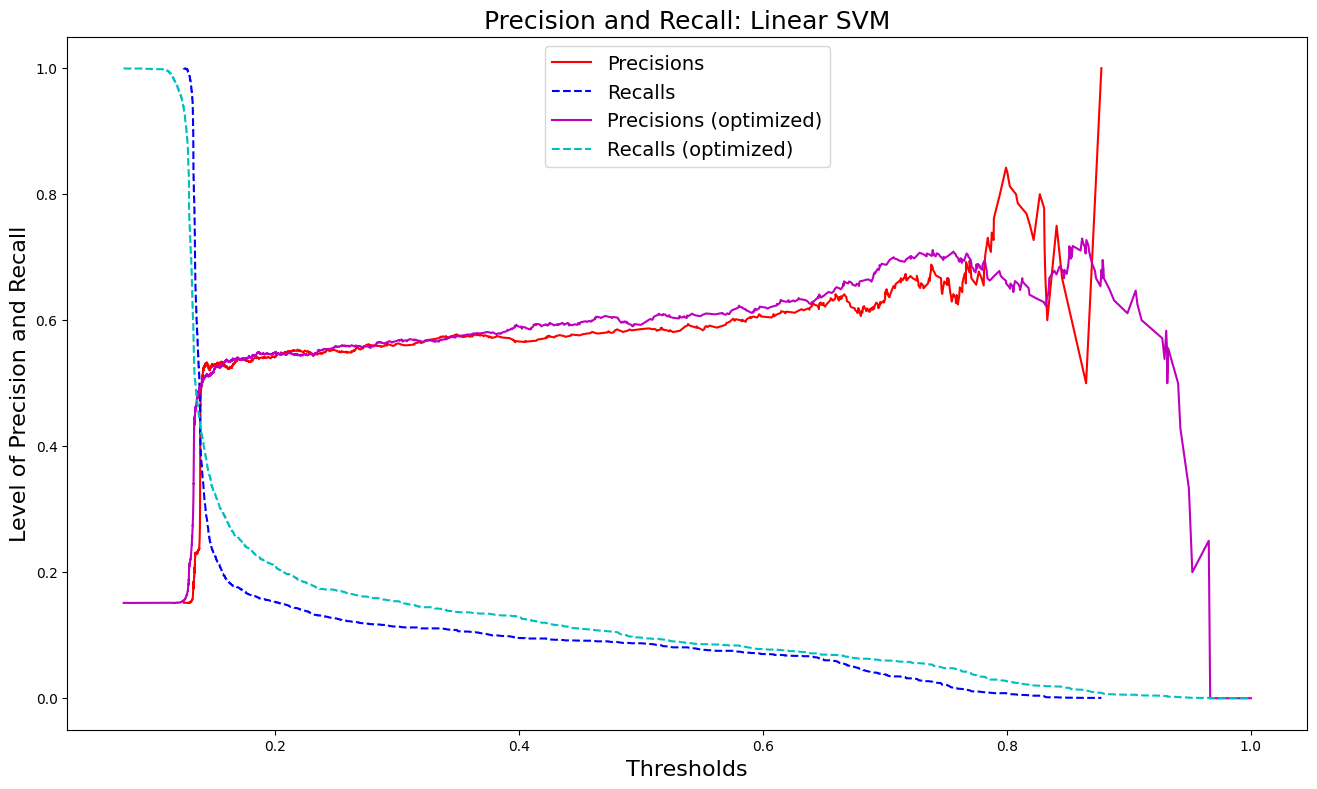

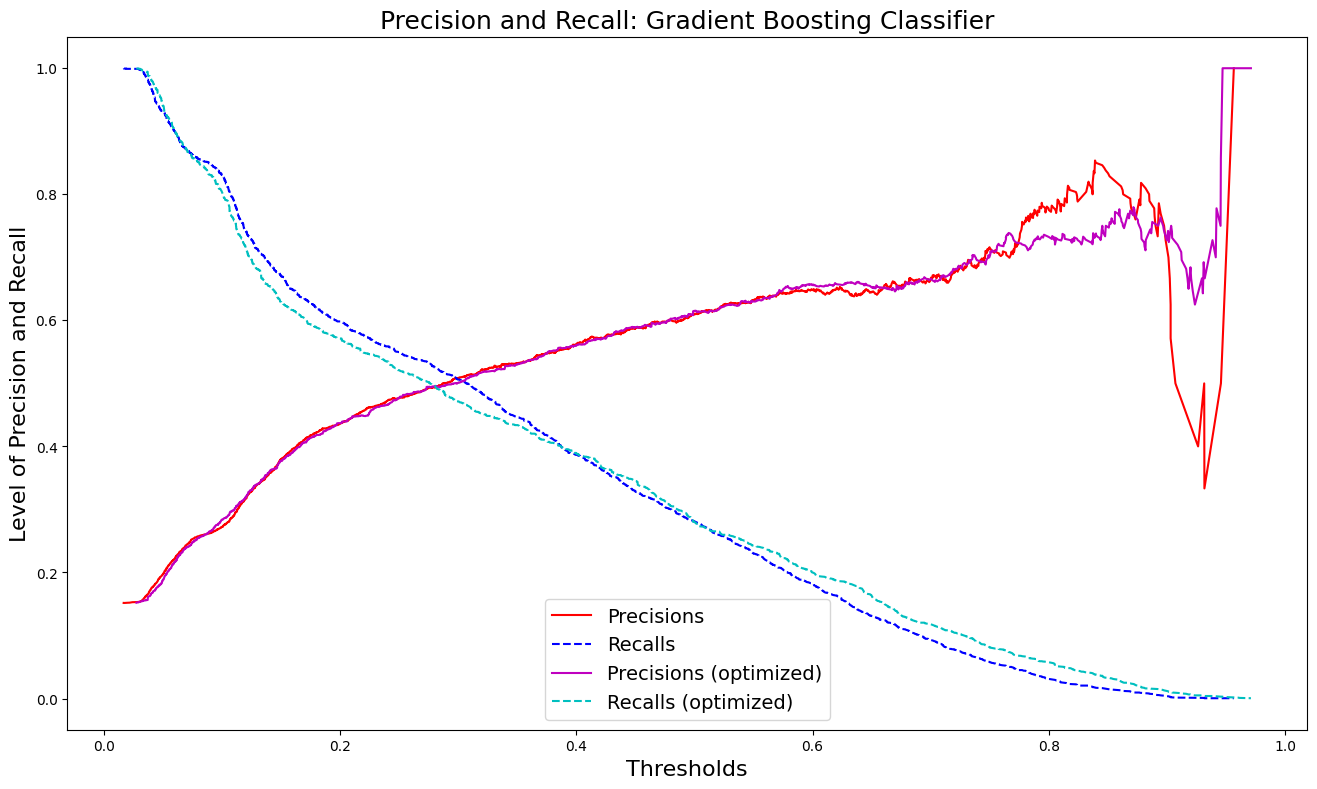

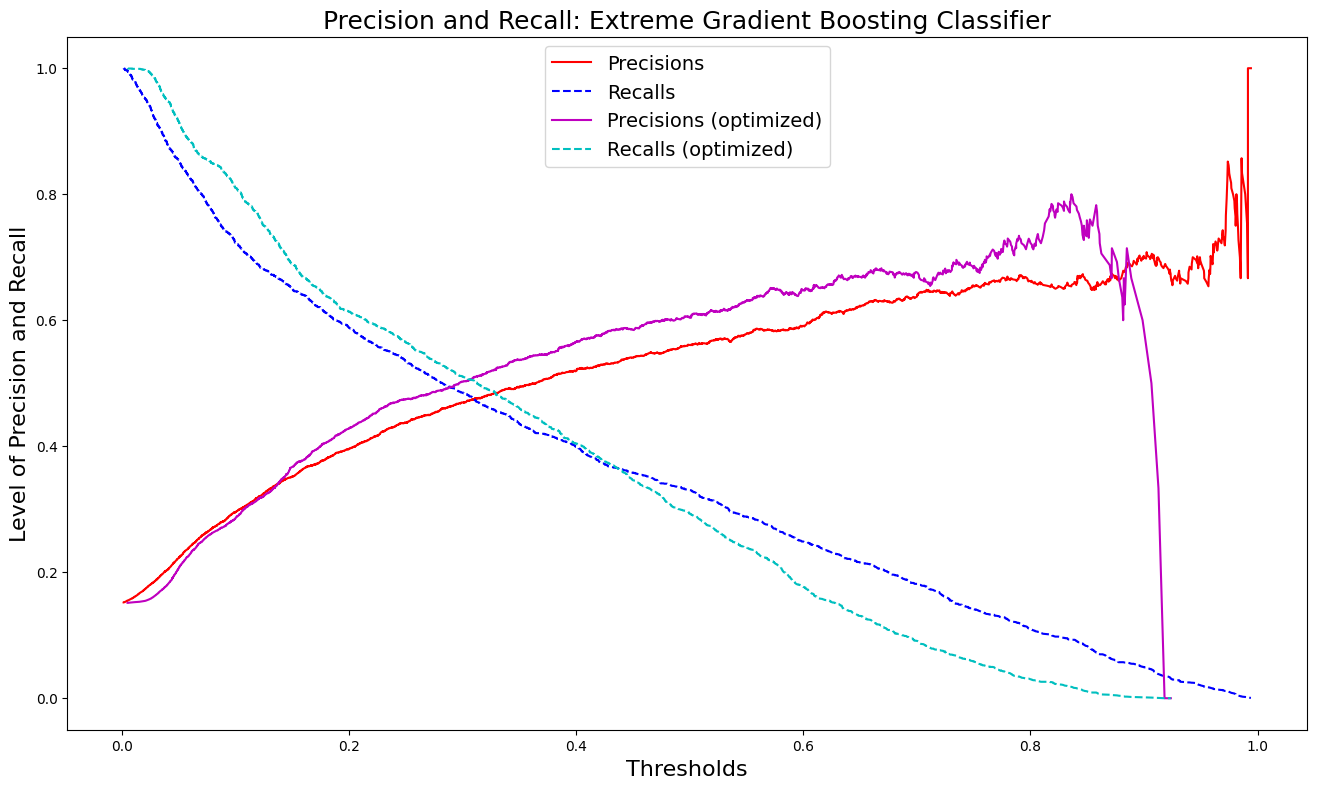

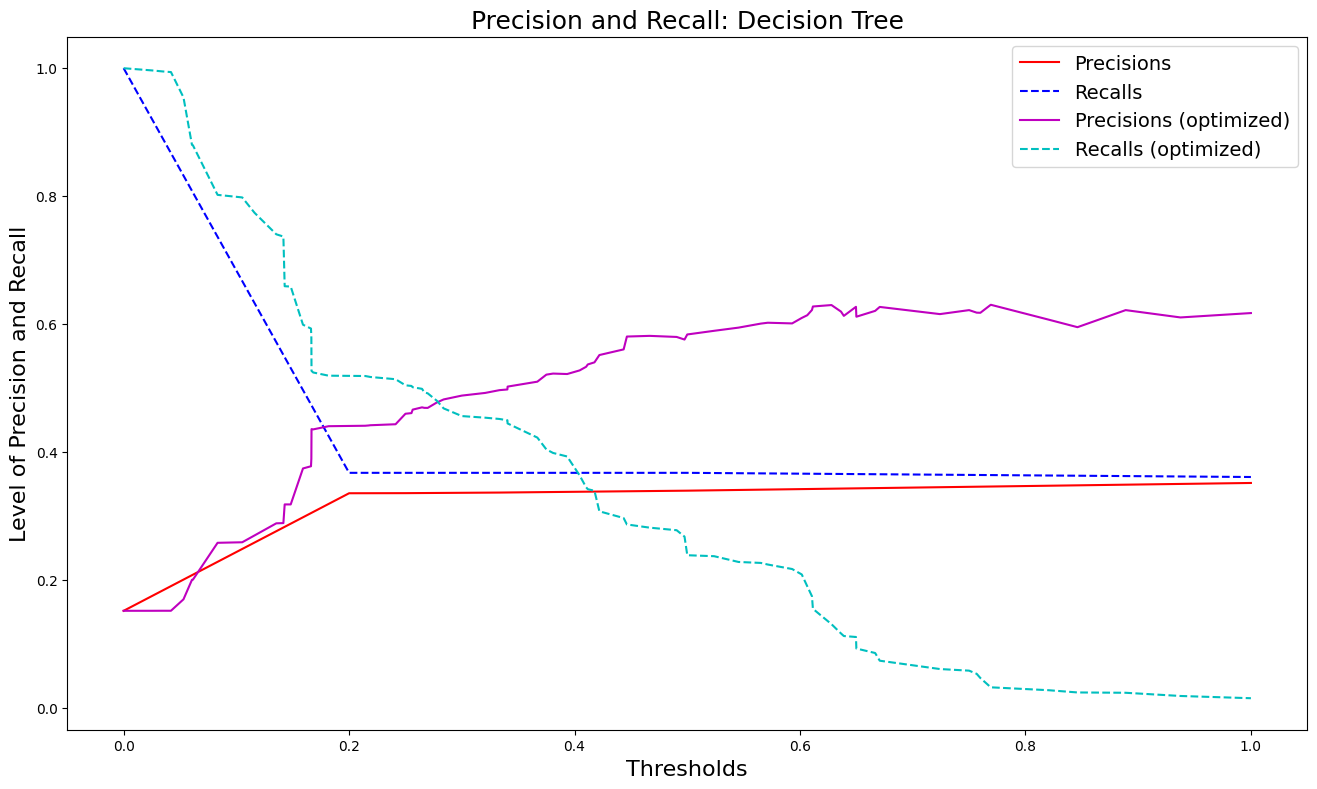

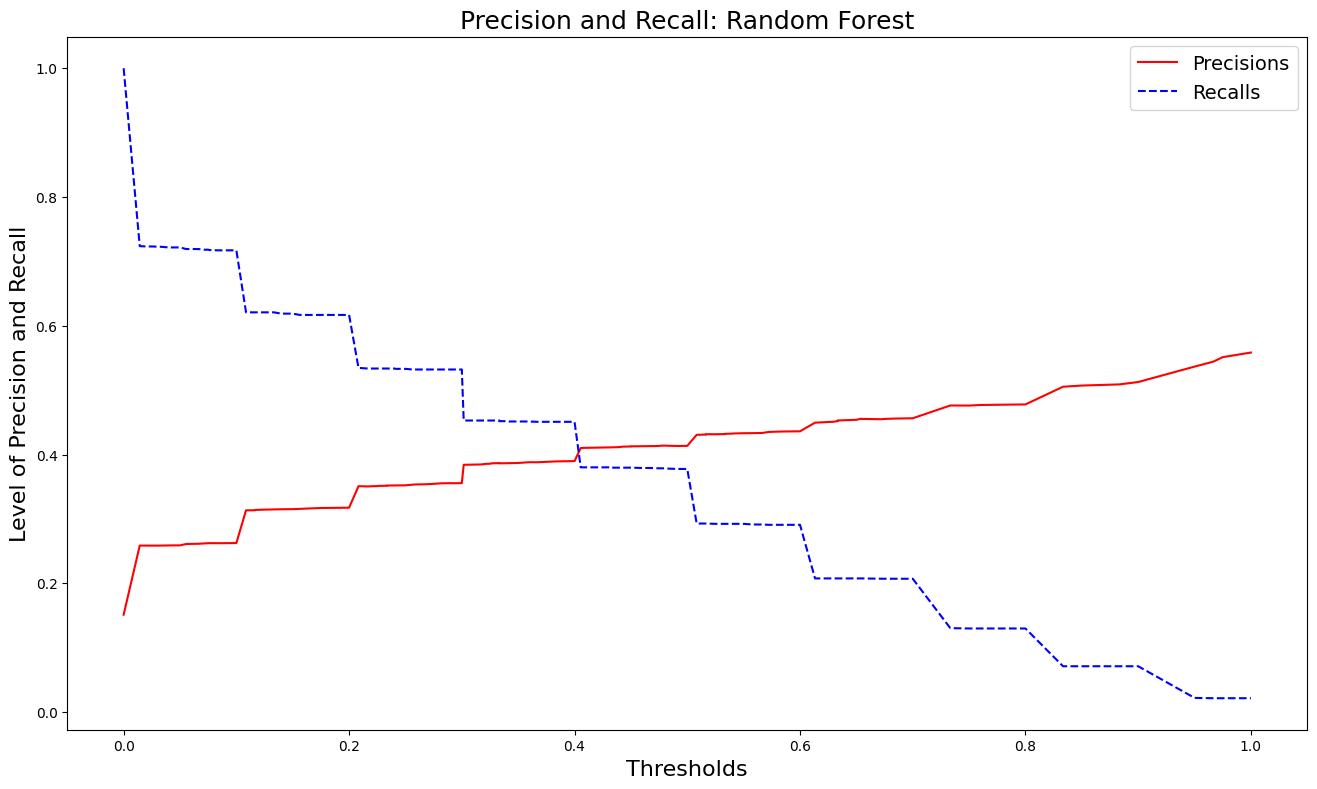

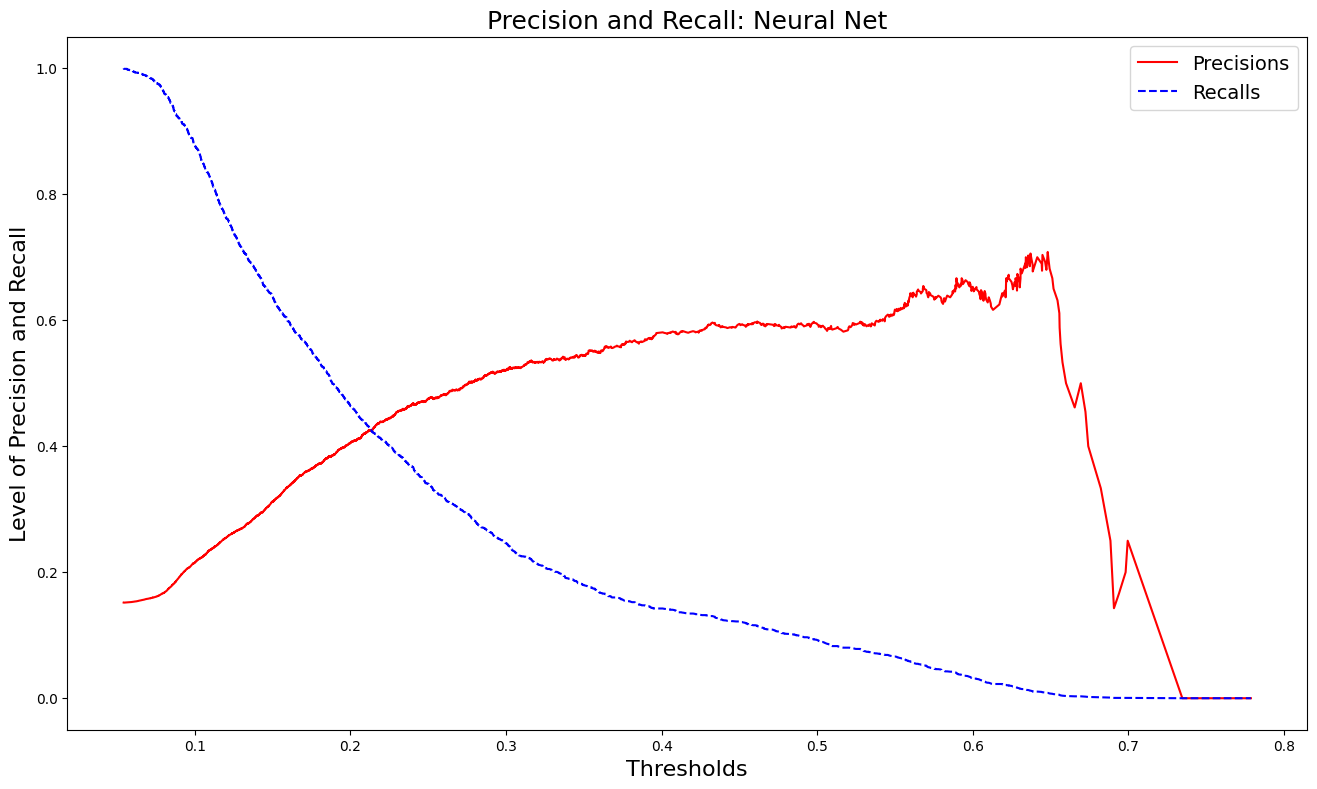

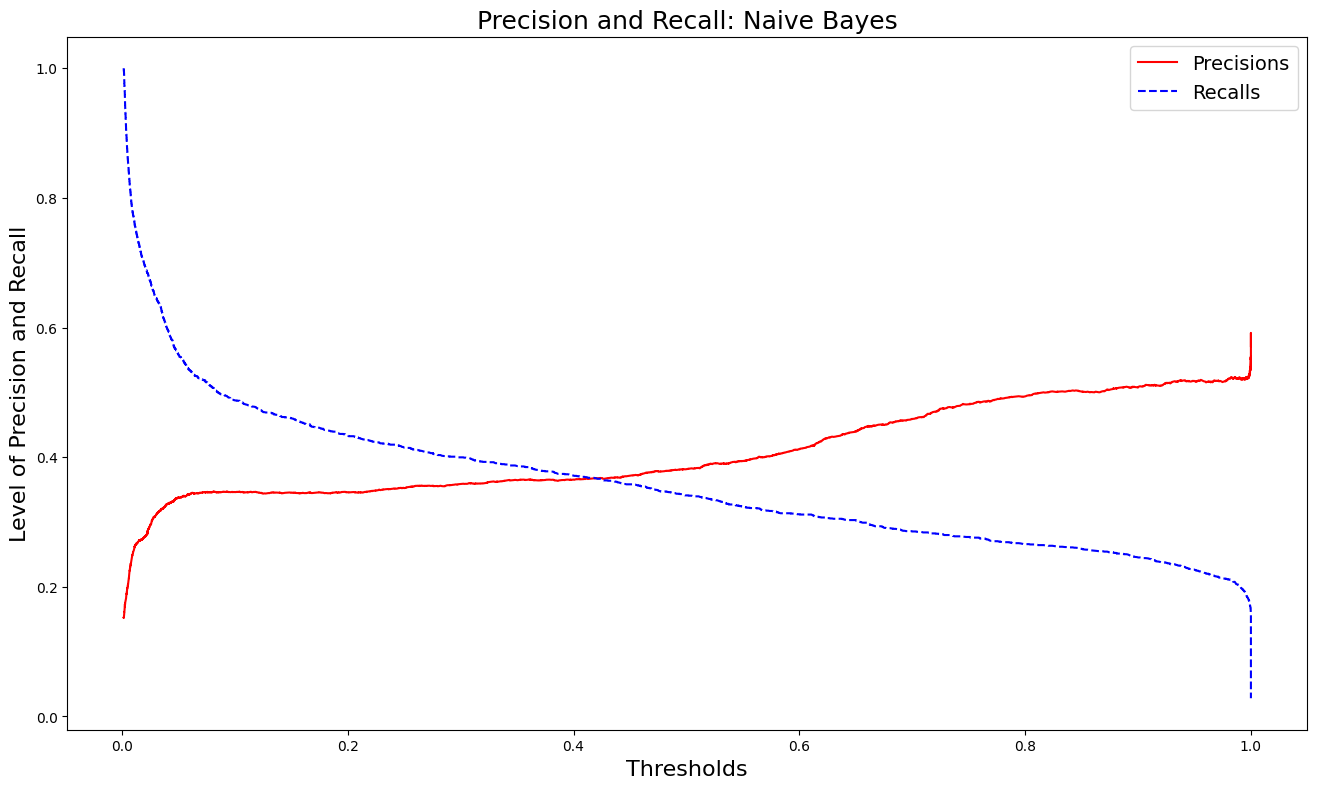

In [69]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve
for model in models['default'].keys():
    if cross_val_scores[model]['default'].ndim!=1 :
        cross_val_scores[model]['default']=cross_val_scores[model]['default'][:,1]
    if not(isinstance(cross_val_scores[model]['tuned'], str)) and cross_val_scores[model]['tuned'].ndim!=1:
        cross_val_scores[model]['tuned']=cross_val_scores[model]['tuned'][:,1]
    precisions_default, recalls_default, threshold_default = precision_recall_curve(y_train, cross_val_scores[model]['default'])
    
    fig, ax = plt.subplots(figsize=(16,9))
    plt.plot(threshold_default, precisions_default[:-1], "r", label="Precisions")
    plt.plot(threshold_default, recalls_default[:-1], "b--", label="Recalls")
    if models['tuned'][model]!=None:
        precisions_tuned, recalls_tuned, threshold_tuned = precision_recall_curve(y_train, cross_val_scores[model]['tuned'])
        plt.plot(threshold_tuned, precisions_tuned[:-1], "m", label="Precisions (optimized)")
        plt.plot(threshold_tuned, recalls_tuned[:-1], "c--", label="Recalls (optimized)")
    plt.title("Precision and Recall: "+model, fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)

Above we can observe that the optimization did pro

# ROC (Receiver Operating Characteristic) Curve / Area under ROC curve (AOC)

This is a very good scale-invariant method. It also measures model's predictions irrespective of what the classification threshold is chosen.

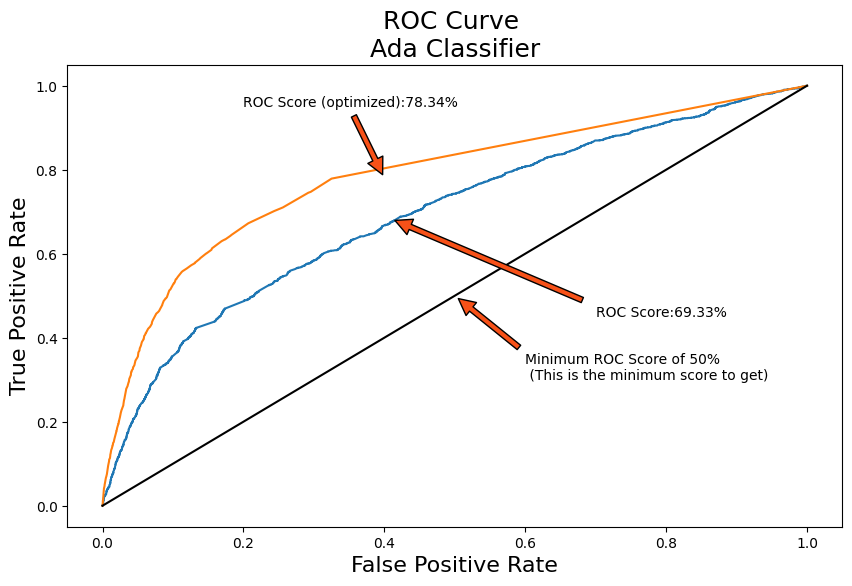

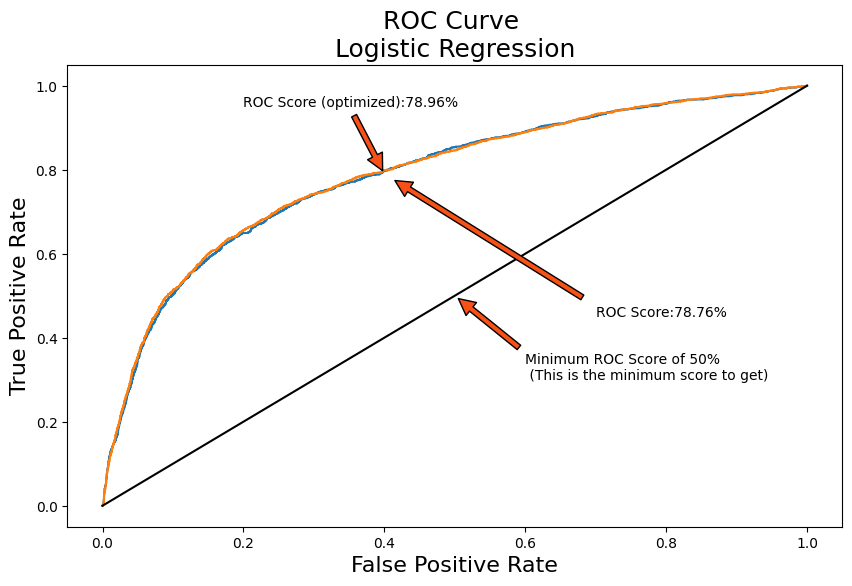

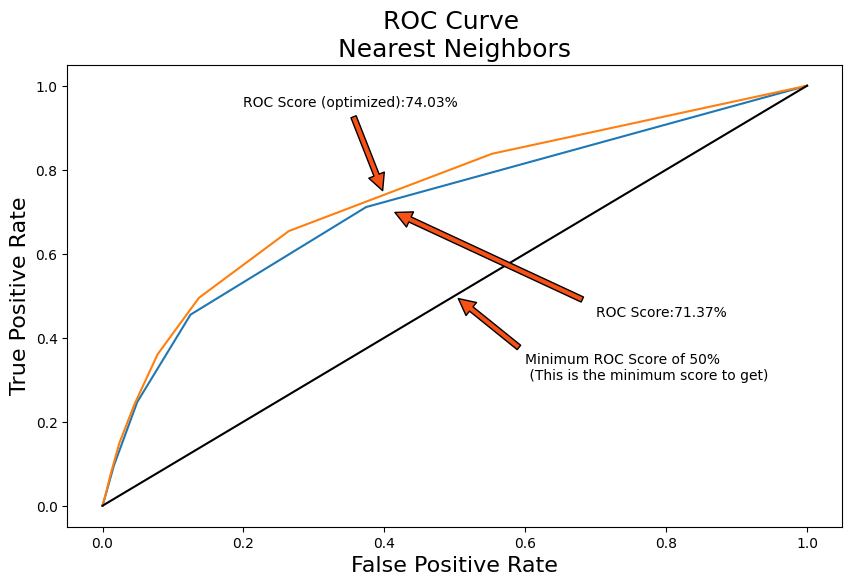

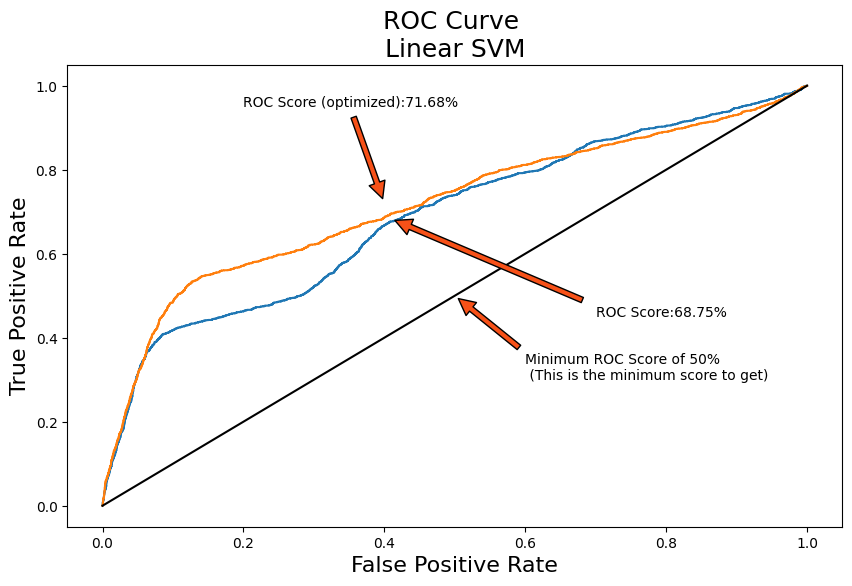

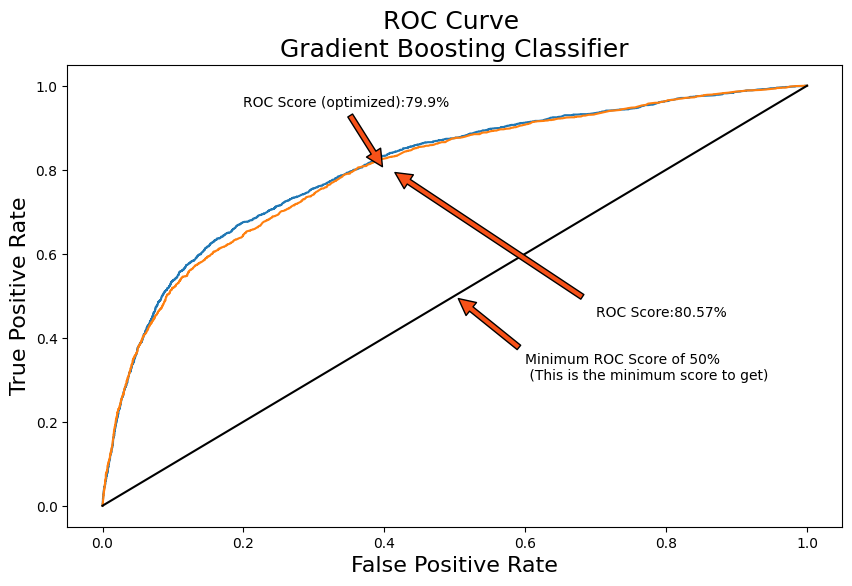

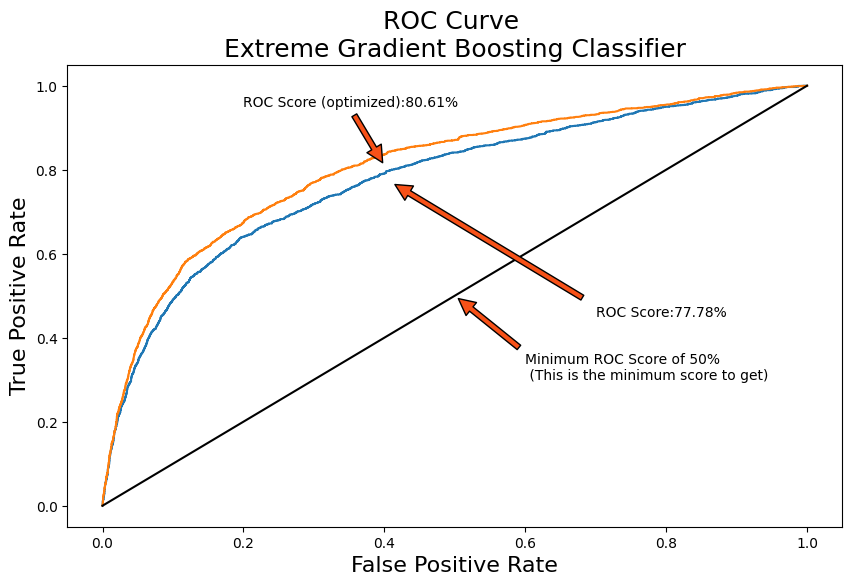

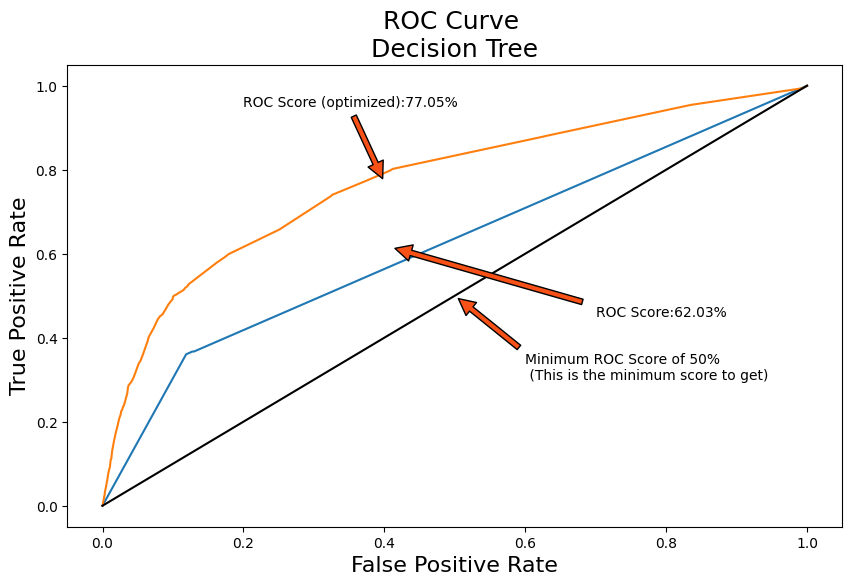

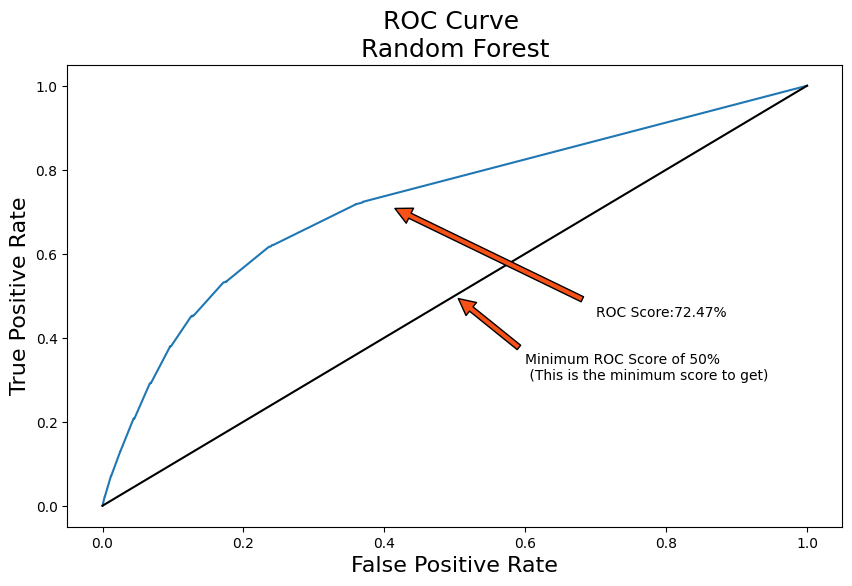

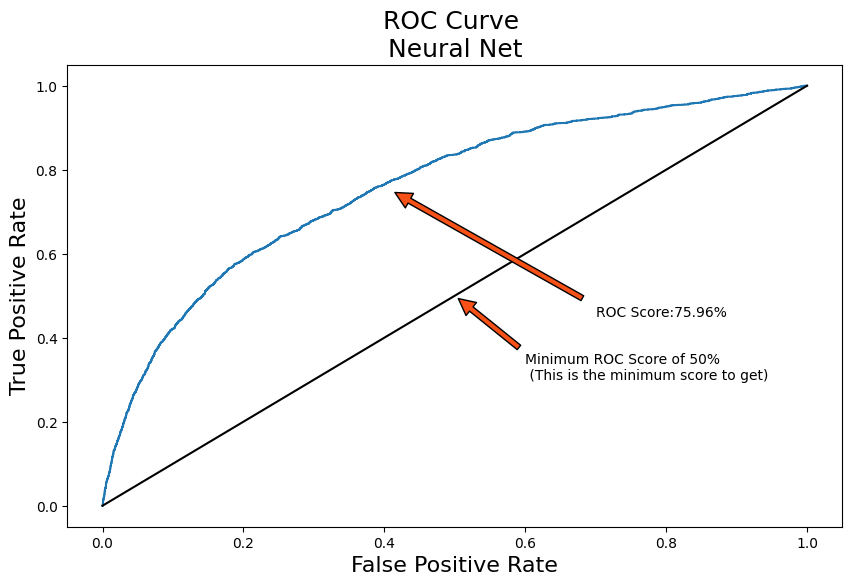

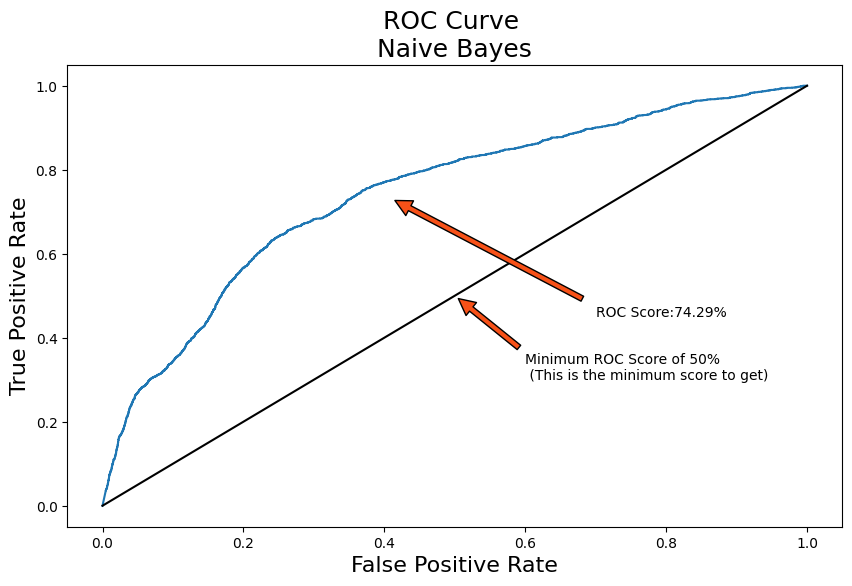

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for model in models['default'].keys():
    if cross_val_scores[model]['default'].ndim==1:
        fpr, tpr, threshold = roc_curve(y_train, cross_val_scores[model]['default'])
        auc = roc_auc_score(y_train, cross_val_scores[model]['default'])
        if not(isinstance(cross_val_scores[model]['tuned'], str)):
            fpr_tuned, tpr_tuned, threshold_tuned = roc_curve(y_train, cross_val_scores[model]['tuned'])
            auc_tuned = roc_auc_score(y_train, cross_val_scores[model]['tuned']) 
  
    else: 
        fpr, tpr, threshold = roc_curve(y_train, cross_val_scores[model]['default'][:,1])
        auc = roc_auc_score(y_train, cross_val_scores[model]['default'][:,1])
        if not(isinstance(cross_val_scores[model]['tuned'], str)):
            fpr_tuned, tpr_tuned, threshold_tuned = roc_curve(y_train, cross_val_scores[model]['tuned'][:,1])
            auc_tuned = roc_auc_score(y_train, cross_val_scores[model]['tuned'][:,1]) 

    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n'+model, fontsize=18)
    plt.plot(fpr, tpr, label='Default')
    if not(isinstance(cross_val_scores[model]['tuned'], str)):
        plt.plot(fpr_tuned, tpr_tuned, label = 'Optimized')
        plt.annotate('ROC Score (optimized):'+str(np.round(auc_tuned*100,2))+'%', xy=(0.4, np.round(auc_tuned,2)), xytext=(0.2, 0.95),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    plt.plot([0, 1], [0, 1], 'black')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score:'+str(np.round(auc*100,2))+'%', xy=(0.4, np.round(auc,2)), xytext=(0.7, 0.45),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                    arrowprops=dict(facecolor='#F75118', shrink=0.05),
                    )

Looking at both the ROC curves together with AUC score, we can see that the hyperparameter optimization produced better results for most of the methods. However, it is also clear that a more thorough scan of the hyperparameter space should be performed to increase the model accuracy. What is also clear is that independent of the optimization:

# The most accurate model for this task is extreme gradient boosting classifier with the accuracy of 86,6%

# Calculated lift from gradient boosting classifier compared to random choice
First let us obtain probabilities of getting 0 or 1:

In [90]:
tuning_xg.fit(X_train,y_train)
y_pred = tuning_xg.predict_proba(X_test)
def lift (test, pred, cardinality):

    res = pd.DataFrame(np.column_stack((test, pred)),
                       columns=['Target','PR_0', 'PR_1'])

    res['Group'] = pd.qcut(res['PR_0'], cardinality, labels=False)+1

    crt = pd.crosstab(res['Group'], res.Target).reset_index()
    crt = crt.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})

    G = crt['Positives'].sum()
    B = crt['Negatives'].sum()
   
    avg_resp_rate = G/(G+B)

    crt['Response Rate'] = round(crt['Positives']/(crt['Positives']+crt['Negatives']),2)
    crt['Lift'] = round((crt['Response Rate']/avg_resp_rate),2)
    crt['Random Response'] = 1/cardinality
    crt['Cumulative Positive'] = round((crt['Positives']).cumsum(),2)
    crt['Cumulative Positive (%)'] = round(((crt['Positives']/G).cumsum())*100,1)
    crt['Cumulative Negative'] = round((crt['Negatives']).cumsum(),2)  
    crt['Cumulative Negative (%)'] = round(((crt['Negatives']/B).cumsum())*100,1)   
    crt['Cumulative (Random) Positive (%)'] = (crt['Random Response'].cumsum())*100
    crt['Cumulative Response Rate'] = round(crt['Cumulative Positive']/(crt['Cumulative Positive']+crt['Cumulative Negative']),2)   
    crt['Cumulative Lift'] = round(crt['Cumulative Response Rate']/avg_resp_rate,2)
    crt['Kolmogorov-Smirnov test']=round(crt['Cumulative Positive (%)']-crt['Cumulative (Random) Positive (%)'],2)
    crt = crt.drop(['Random Response','Cumulative Positive','Cumulative Negative',], axis=1)
    
    print('average response rate: ' , avg_resp_rate)
    return crt


C:\Users\u1150670\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [13:43:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [91]:
ModelLift=lift(y_test,y_pred,10)

average response rate:  0.1486650485436893


In [100]:
ModelLift.index =np.arange(1,11,1,dtype=int)

(1.0, 4.0)

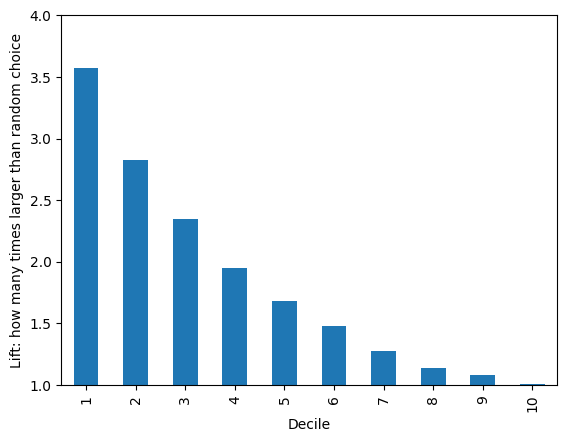

In [101]:
ModelLift['Cumulative Lift'].plot(kind='bar')
plt.ylabel("Lift: how many times larger than random choice")
plt.xlabel("Decile")
plt.ylim(1,4)

# Example strategy for the Marketing Campaign:

Months of Marketing Activity:
The most active period for marketing was May. That month,however, clients tended to reject term deposits offers. 

The next marketing campaign should focus on March, September, October and December, when the ratio between rejected and accepted subscription offers was closest to 50:50.

<AxesSubplot: title={'center': 'Months of activity'}>

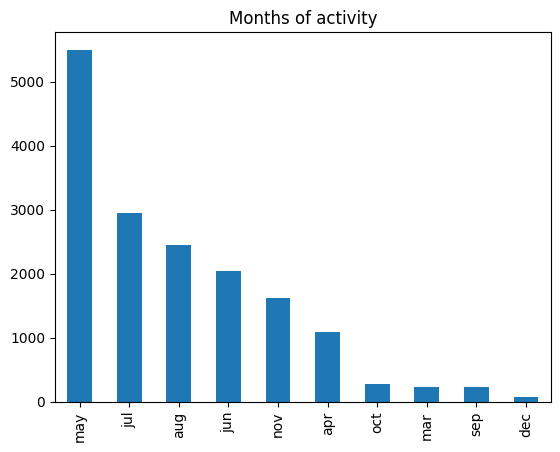

In [80]:
plt.figure()
plt.title('Months of activity')
data['month'].value_counts().plot(kind='bar')

In [81]:
subscription={}
for month in data['month'].unique():
    if isinstance(month, str):
#         plt.figure()
        s=data[data['month']==month]
        subscription[month]=s['y'].value_counts()
subscription=pd.DataFrame(subscription)
subscription

,may,jun,jul,aug,oct,nov,dec,mar,apr,sep
no,4840,1752,2543,2122,163,1398,40,126,864,144
yes,657,295,405,330,121,223,38,102,229,84


#  Final remarks
* The presented results are only preliminary and there is plenty room for improvement.
* It is visible that the accuracy metric is not the best method for choosing the best algorithm.
* Hyperparameter tuning would also need a more thorough scan of the hyperparameter space.
* For this initial analysis, I chose very conservative thresholds for feature selection. Investigation of other thresholds and number of selected features could also be improved.